In [1]:
import akshare as ak
import pandas as pd
import numpy as np
import quantstats as qs
import pyfolio as pf

D:\Anaconda\lib\site-packages\akshare\__init__.py:2901: UserWarning: 为了支持更多特性，请将 Pandas 升级到 2.2.0 及以上版本！
  warnings.warn(
D:\Anaconda\lib\site-packages\pyfolio\pos.py:25: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(


In [65]:
df_stock = ak.stock_zh_a_hist(symbol='000001',start_date='20200101',end_date='20241203',adjust='qfq')
df_stock

,日期,股票代码,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率
0,2020-01-02,000001,14.77,14.99,15.07,14.67,1530232,2.571196e+09,2.75,2.88,0.42,0.79
1,2020-01-03,000001,15.06,15.30,15.43,15.04,1116195,1.914495e+09,2.60,2.07,0.31,0.58
2,2020-01-06,000001,15.13,15.19,15.46,15.03,862084,1.477930e+09,2.81,-0.72,-0.11,0.44
3,2020-01-07,000001,15.25,15.27,15.40,15.07,728608,1.247047e+09,2.17,0.53,0.08,0.38
4,2020-01-08,000001,15.12,14.78,15.17,14.75,847824,1.423609e+09,2.75,-3.21,-0.49,0.44
...,...,...,...,...,...,...,...,...,...,...,...,...
1187,2024-11-27,000001,11.24,11.39,11.39,11.15,895178,1.010002e+09,2.13,1.06,0.12,0.46
1188,2024-11-28,000001,11.39,11.34,11.42,11.32,733169,8.331213e+08,0.88,-0.44,-0.05,0.38
1189,2024-11-29,000001,11.37,11.38,11.46,11.34,1028488,1.173316e+09,1.06,0.35,0.04,0.53
1190,2024-12-02,000001,11.39,11.39,11.40,11.31,975434,1.108786e+09,0.79,0.09,0.01,0.50


In [66]:
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1192 entries, 0 to 1191
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   日期      1192 non-null   object 
 1   股票代码    1192 non-null   object 
 2   开盘      1192 non-null   float64
 3   收盘      1192 non-null   float64
 4   最高      1192 non-null   float64
 5   最低      1192 non-null   float64
 6   成交量     1192 non-null   int64  
 7   成交额     1192 non-null   float64
 8   振幅      1192 non-null   float64
 9   涨跌幅     1192 non-null   float64
 10  涨跌额     1192 non-null   float64
 11  换手率     1192 non-null   float64
dtypes: float64(9), int64(1), object(2)
memory usage: 111.9+ KB


In [70]:
df_stock['日期'] = pd.to_datetime(df_stock['日期'])

In [71]:
df_stock = df_stock.set_index('日期')

In [72]:
stock_returns = df_stock['收盘'].pct_change().dropna()

In [73]:
stock_returns

日期
2020-01-03    0.020680
2020-01-06   -0.007190
2020-01-07    0.005267
2020-01-08   -0.032089
2020-01-09    0.008796
                ...   
2024-11-27    0.010648
2024-11-28   -0.004390
2024-11-29    0.003527
2024-12-02    0.000879
2024-12-03    0.008780
Name: 收盘, Length: 1191, dtype: float64

In [74]:
df_300 = ak.stock_zh_index_daily_em(symbol='sh000300',start_date='20200101',end_date='20241203')
df_300['date'] = pd.to_datetime(df_300['date'])
df_300 = df_300.set_index('date')
bench_returns = df_300.close.pct_change().dropna()
bench_returns

date
2020-01-03   -0.001753
2020-01-06   -0.003778
2020-01-07    0.007490
2020-01-08   -0.011516
2020-01-09    0.012657
                ...   
2024-11-27    0.017411
2024-11-28   -0.008828
2024-11-29    0.011370
2024-12-02    0.007928
2024-12-03    0.001079
Name: close, Length: 1191, dtype: float64

In [75]:
stock_returns
qs.stats.cagr(stock_returns)
qs.stats.volatility(stock_returns)
qs.stats.calmar(stock_returns)
qs.stats.sharpe(stock_returns)
qs.stats.max_drawdown(stock_returns)
qs.stats.sortino(stock_returns)


0.01959764585965773

In [76]:
qs.stats.information_ratio(stock_returns,benchmark=bench_returns)
qs.stats.greeks(stock_returns,benchmark=bench_returns)

beta     1.132106
alpha   -0.005570
dtype: float64

In [77]:
qs.stats.greeks(stock_returns,benchmark=bench_returns).beta

1.1321061087403697

Start date,2020-01-03
End date,2024-12-03
Total months,56
,Backtest
Annual return,-5.471%
Cumulative returns,-23.349%
Annual volatility,34.99%
Sharpe ratio,0.01
Calmar ratio,-0.08
Stability,0.41
Max drawdown,-65.703%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,65.41,2021-05-26,2023-12-19,NaT,NaN
1,30.46,2020-01-03,2020-03-20,2020-10-16,206
2,19.71,2021-02-03,2021-04-15,2021-05-26,81
3,9.62,2020-12-01,2020-12-21,2021-01-11,30
4,3.96,2020-11-04,2020-11-12,2020-11-18,11


D:\Anaconda\lib\site-packages\pyfolio\timeseries.py:1236: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  period = returns_dupe.loc[start:end]


Stress Events,mean,min,max
Covid,0.02%,-9.50%,11.36%


D:\Anaconda\lib\site-packages\pyfolio\timeseries.py:1236: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  period = returns_dupe.loc[start:end]


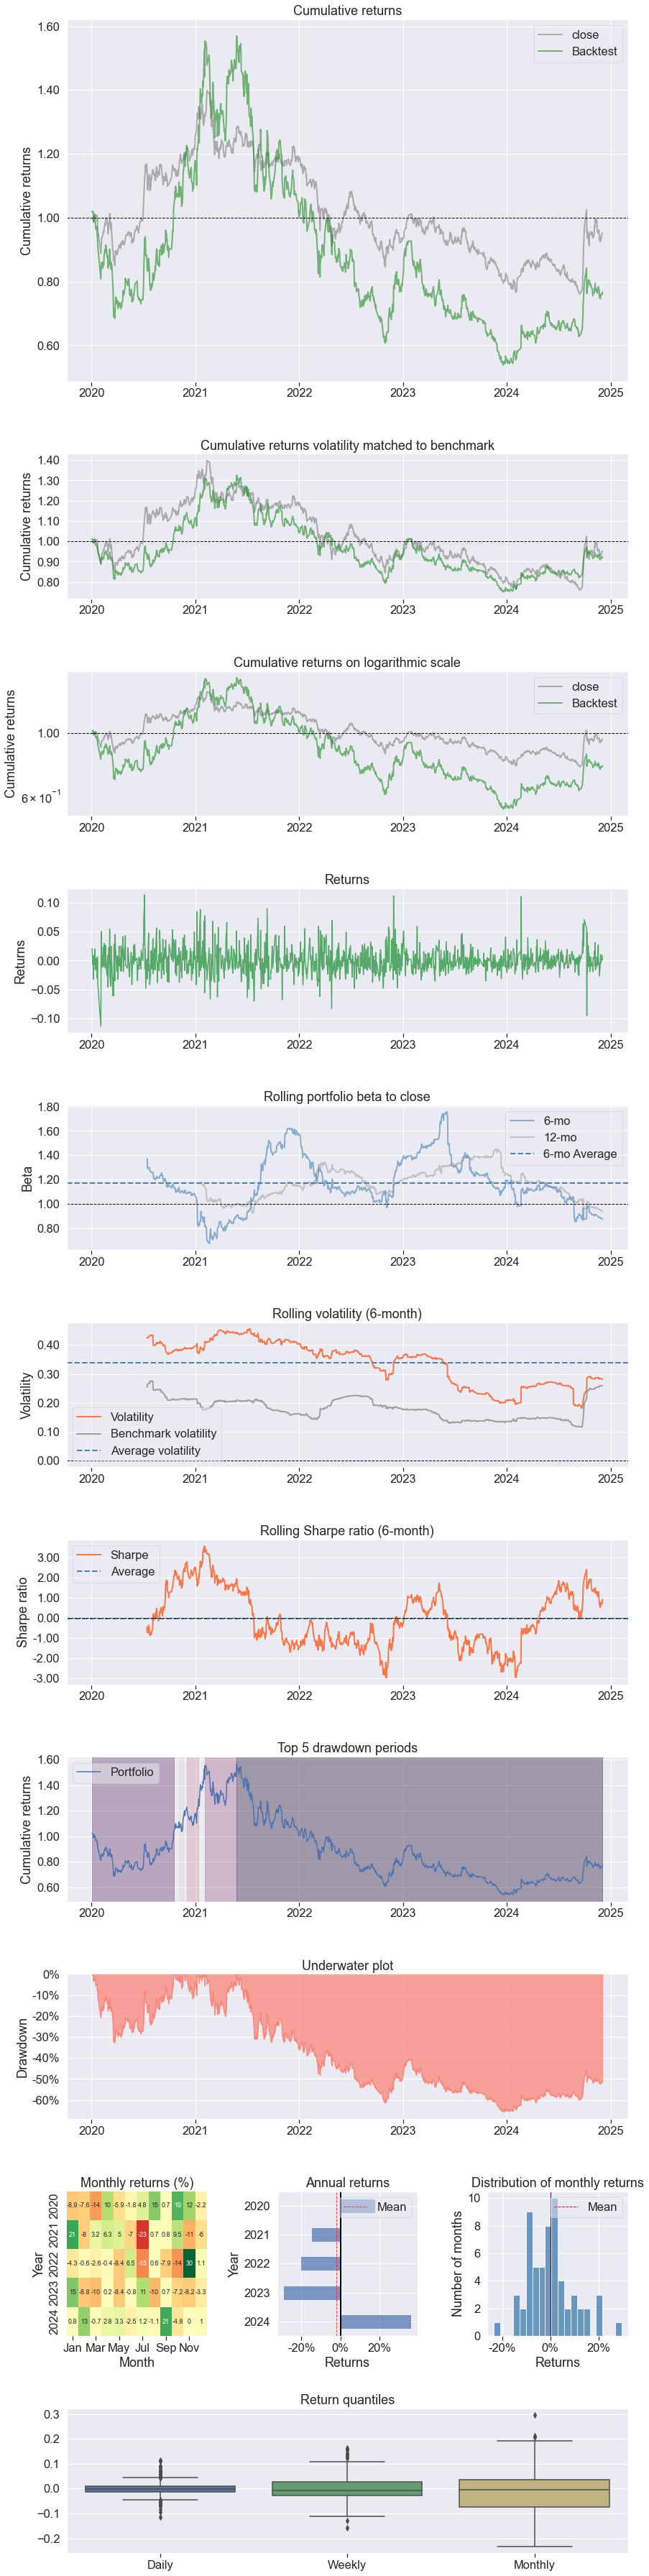

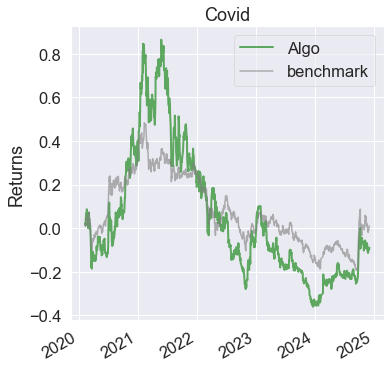

In [78]:
pf.create_full_tear_sheet(stock_returns,benchmark_rets=bench_returns)

In [84]:
np.random.seed(111)
number_days=100
prices = np.random.normal(loc=10,scale=10,size=number_days)
dates = pd.date_range(start='2024-01-01',periods=100,freq='D')
df_close = pd.DataFrame(prices,index=dates,columns=['close'])
df_close.pct_change().dropna()

,close
2024-01-02,-11.343219
2024-01-03,0.803452
2024-01-04,-0.741797
2024-01-05,-0.670399
2024-01-06,1.544218
...,...
2024-04-05,3.489826
2024-04-06,-1.016241
2024-04-07,-18.320094
2024-04-08,-1.669194
